In [3]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23924 sha256=7c3a44ad67acf3decc9dbd10d41b62a14e6acbde44cfc372bdc9a2190b67bd91
  Stored in directory: c:\users\alexb\appdata\local\pip\cache\wheels\ec\cc\c1\32da8ee853d742d5d7cbd11ee04421222eb354672020b57297
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8382 sha256=1d40801acfe7e4d27794f43e7c4038bcefffa4cb245ba6984e5ae198a59a5aac
  Stored in directory: c:\users\alexb\appdata\local\pip\cache\wheels\57\6d\a3\a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


In [98]:
import requests
import pandas as pd
import numpy as np
import matplotlib as plt
from plotly.offline import plot
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import mplfinance
import seaborn as sns


In [206]:
tsla=yf.Ticker('TSLA').history('5y')

In [207]:
tsla.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-08-23,44.863998,45.698002,44.560001,44.967999,23922000,0,0.0
2016-08-24,45.410000,45.430000,44.444000,44.523998,12853500,0,0.0
2016-08-25,44.622002,44.759998,44.153999,44.192001,8812500,0,0.0
2016-08-26,44.428001,44.571999,43.764000,43.998001,11195000,0,0.0
2016-08-29,44.029999,44.080002,43.000000,43.040001,16331500,0,0.0


In [208]:
tsla_orig=tsla.copy()

In [209]:
tsla=tsla[['Open']]
tsla.head()

,Open
Date,
2016-08-23,44.863998
2016-08-24,45.410000
2016-08-25,44.622002
2016-08-26,44.428001
2016-08-29,44.029999


## Generating a complete Index and Setting Frequency

In [210]:
print('\nUnique dates in our data: ', len(tsla.index.unique()), 'Days')
our_date_range = tsla.index.max() - tsla.index.min()

# Calculate number of days in date range
print('Total days in our date range:', our_date_range.days, 'Days')
#date_range = pd.date_range(min(sales.index), max(sales.index))


Unique dates in our data:  1259 Days
Total days in our date range: 1826 Days


In [211]:
new_index = pd.date_range(tsla.index.min(), tsla.index.max(), freq='D')
print(len(new_index))

1827


In [212]:
tsla.values.tolist()

[[44.86399841308594],
 [45.40999984741211],
 [44.62200164794922],
 [44.428001403808594],
 [44.029998779296875],
 [43.22200012207031],
 [42.08599853515625],
 [41.801998138427734],
 [40.465999603271484],
 [39.80400085449219],
 [41.099998474121094],
 [39.90999984741211],
 [39.81800079345703],
 [39.0],
 [39.4119987487793],
 [39.150001525878906],
 [39.29800033569336],
 [40.08399963378906],
 [41.400001525878906],
 [41.369998931884766],
 [41.27399826049805],
 [41.279998779296875],
 [41.198001861572266],
 [41.29999923706055],
 [41.93000030517578],
 [41.50199890136719],
 [41.119998931884766],
 [40.44200134277344],
 [42.459999084472656],
 [42.619998931884766],
 [42.448001861572266],
 [40.492000579833984],
 [40.20000076293945],
 [40.27000045776367],
 [40.369998931884766],
 [40.189998626708984],
 [40.099998474121094],
 [40.13199996948242],
 [39.40999984741211],
 [39.198001861572266],
 [39.948001861572266],
 [40.42399978637695],
 [39.720001220703125],
 [40.20000076293945],
 [40.58000183105469],
 [4

In [213]:
#Reindex the tsla dataframe
tsla_new = tsla.reindex(new_index, fill_value=np.inf)

In [214]:
tesla_new_values=[]
for i in range(len(tsla_new.values.tolist())):
    if tsla_new.values.tolist()[i][0] != np.inf:
        tesla_new_values.append(tsla_new.values.tolist()[i][0])
    elif tsla_new.values.tolist()[i-1][0] !=np.inf:
        tesla_new_values.append(tsla_new.values.tolist()[i-1][0])
    elif tsla_new.values.tolist()[i-2][0] !=np.inf:
        tesla_new_values.append(tsla_new.values.tolist()[i-2][0])
    else:
        tesla_new_values.append(tsla_new.values.tolist()[i-3][0])

In [215]:
tesla_new_values

[44.86399841308594,
 45.40999984741211,
 44.62200164794922,
 44.428001403808594,
 44.428001403808594,
 44.428001403808594,
 44.029998779296875,
 43.22200012207031,
 42.08599853515625,
 41.801998138427734,
 40.465999603271484,
 40.465999603271484,
 40.465999603271484,
 40.465999603271484,
 39.80400085449219,
 41.099998474121094,
 39.90999984741211,
 39.81800079345703,
 39.81800079345703,
 39.81800079345703,
 39.0,
 39.4119987487793,
 39.150001525878906,
 39.29800033569336,
 40.08399963378906,
 40.08399963378906,
 40.08399963378906,
 41.400001525878906,
 41.369998931884766,
 41.27399826049805,
 41.279998779296875,
 41.198001861572266,
 41.198001861572266,
 41.198001861572266,
 41.29999923706055,
 41.93000030517578,
 41.50199890136719,
 41.119998931884766,
 40.44200134277344,
 40.44200134277344,
 40.44200134277344,
 42.459999084472656,
 42.619998931884766,
 42.448001861572266,
 40.492000579833984,
 40.20000076293945,
 40.20000076293945,
 40.20000076293945,
 40.27000045776367,
 40.36999893

In [216]:
tesla_new_2=pd.DataFrame(tesla_new_values, columns=['Open stock price'],index=new_index)

In [217]:
tesla_new_2.shape

(1827, 1)

Text(0.5, 1.0, 'Tesla stock price')

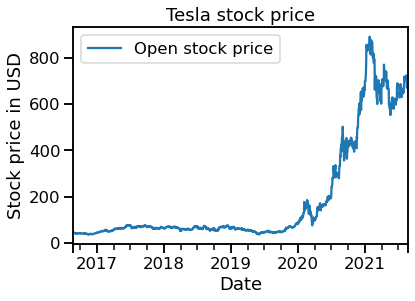

In [354]:
tesla_new_2.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Stock price in USD')
plt.title('Tesla stock price')

In [219]:
tesla_new_2.head()

,Open stock price
2016-08-23,44.863998
2016-08-24,45.410000
2016-08-25,44.622002
2016-08-26,44.428001
2016-08-27,44.428001


In [220]:
#check the inf values
print('Infinity values before',tsla_new[tsla_new.iloc[:,0]>1e7].value_counts())
print('Infinity values after',tesla_new_2[tesla_new_2.iloc[:,0]>1e7].value_counts())

Infinity values before Open
inf     568
dtype: int64
Infinity values after Series([], dtype: int64)


In [158]:
len(train_y)

110

In [361]:
print('\nUnique dates in our data: ', len(tesla_new_2.index.unique()), 'Days')
our_date_range = tesla_new_2.index.max() - tesla_new_2.index.min()

# Calculate number of days in date range
print('Total days in our date range:', our_date_range.days+1, 'Days')
#date_range = pd.date_range(min(sales.index), max(sales.index))


Unique dates in our data:  1827 Days
Total days in our date range: 1827 Days


## Making a SimpleRNN for predicting 30 last days of stock prices

In [221]:
#Import keras libraries
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [222]:
def get_n_last_days(df, series_name, n_days):
    """
    Extract last n_days of an hourly time series
    """
    
    return df[series_name][-(n_days):] 

In [223]:
#Check the get_n_last_days function
#get_n_last_days(tesla_new_2,'Open stock price',30)

In [224]:
#Get keras format
def get_keras_format_series(series):
    """
    Convert a series to a numpy array of shape 
    [n_samples, time_steps, features]
    """
    
    series = np.array(series)
    return series.reshape(series.shape[0], series.shape[1], 1)

In [225]:
def get_train_test_data(df, series_name, input_days, 
                        test_days, sample_gap=1):
    """
    Utility processing function that splits an hourly time series into 
    train and test with keras-friendly format, according to user-specified
    choice of shape.    
    
    arguments
    ---------
    df (dataframe): dataframe with time series columns
    series_name (string): column name in df
    series_days (int): total days to extract
    input_days (int): length of sequence input to network 
    test_days (int): length of held-out terminal sequence
    sample_gap (int): step size between start of train sequences; default 5
    
    returns
    ---------
    tuple: train_X, test_X_init, train_y, test_y     
    """
    
    forecast_series = get_n_last_days(df, series_name, len(df)).values # reducing our forecast series to last n days

    train = forecast_series[:-test_days] # training data is remaining days until amount of test_days
    test = forecast_series[-test_days:] # test data is the remaining test_days

    train_X, train_y = [], []

    # range 0 through # of train samples - input_days by sample_gap. 
    # This is to create many samples with corresponding
    for i in range(0, train.shape[0]-input_days, sample_gap): 
        train_X.append(train[i:i+input_days]) # each training sample is of length input days
        train_y.append(train[i+input_days]) # each y is just the next step after training sample

    train_X = get_keras_format_series(train_X) # format our new training set to keras format
    train_y = np.array(train_y) # make sure y is an array to work properly with keras
    
    # The set that we had held out for testing (must be same length as original train input)
    test_X_init = test[:input_days] 
    test_y = test[input_days:] # test_y is remaining values from test set
    
    return train_X, test_X_init, train_y, test_y

In [226]:
input_days=12
test_days=30
train_X, test_X_init, train_y, test_y= get_train_test_data(tesla_new_2, 'Open stock price', input_days, 
                        test_days, sample_gap=1)

In [262]:
train_X.shape

(1785, 12, 1)

In [228]:
#Predict function
def predict(X_init, X_true, model):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series      
    """
    
    X_init = X_init.copy().reshape(1,-1,1)
    preds = []
    n_steps=len(X_true)
    # iteratively take current input sequence, generate next step pred,
    # and shift input sequence forward by a step (to end with latest pred).
    # collect preds as we go.
    for _ in range(n_steps):
        pred = model.predict(X_init)
        preds.append(pred)
        X_init[:,:-1,:] = X_init[:,1:,:] # replace first 6 values with 2nd through 7th
        X_init[:,-1,:] = pred # replace 7th value with prediction 
    
    preds = np.array(preds).reshape(-1,1)
    
    return preds

In [229]:
#Make a model
def fit_SimpleRNN(train_X, train_y, cell_units, epochs):
    """
    Fit Simple RNN to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for RNN cells  
    epochs (int): number of training epochs   
    """

    # initialize model
    model = Sequential() 
    
    # construct an RNN layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(SimpleRNN(cell_units, input_shape=(train_X.shape[1],1)))
    
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=64, verbose=1)
    
    return model

In [237]:
#Fit model now
model = fit_SimpleRNN(train_X, train_y, cell_units=30, epochs=1000)

Epoch 1/1000
28/28 [==============================] - 1s 4ms/step - loss: 82342.8125
Epoch 2/1000
28/28 [==============================] - 0s 4ms/step - loss: 81641.1797
Epoch 3/1000
28/28 [==============================] - 0s 4ms/step - loss: 81053.6641
Epoch 4/1000
28/28 [==============================] - 0s 4ms/step - loss: 80383.5078
Epoch 5/1000
28/28 [==============================] - 0s 4ms/step - loss: 79852.4141
Epoch 6/1000
28/28 [==============================] - 0s 4ms/step - loss: 79465.1250
Epoch 7/1000
28/28 [==============================] - 0s 5ms/step - loss: 79171.1406
Epoch 8/1000
28/28 [==============================] - 0s 4ms/step - loss: 78879.5156
Epoch 9/1000
28/28 [==============================] - 0s 4ms/step - loss: 78590.6797
Epoch 10/1000
28/28 [==============================] - 0s 4ms/step - loss: 78305.6562
Epoch 11/1000
28/28 [==============================] - 0s 4ms/step - loss: 78020.6406
Epoch 12/1000
28/28 [==============================] - 0s 4ms/s

28/28 [==============================] - 0s 4ms/step - loss: 59951.9453
Epoch 97/1000
28/28 [==============================] - 0s 4ms/step - loss: 59777.8633
Epoch 98/1000
28/28 [==============================] - 0s 3ms/step - loss: 59606.8047
Epoch 99/1000
28/28 [==============================] - 0s 4ms/step - loss: 59433.0820
Epoch 100/1000
28/28 [==============================] - 0s 4ms/step - loss: 59259.7930
Epoch 101/1000
28/28 [==============================] - 0s 4ms/step - loss: 59088.4922
Epoch 102/1000
28/28 [==============================] - 0s 4ms/step - loss: 58917.9258
Epoch 103/1000
28/28 [==============================] - 0s 4ms/step - loss: 58745.5547
Epoch 104/1000
28/28 [==============================] - 0s 4ms/step - loss: 58574.4492
Epoch 105/1000
28/28 [==============================] - 0s 4ms/step - loss: 58403.1328
Epoch 106/1000
28/28 [==============================] - 0s 4ms/step - loss: 58231.6641
Epoch 107/1000
28/28 [==============================] - 0s 4m

28/28 [==============================] - 0s 4ms/step - loss: 44989.9531
Epoch 191/1000
28/28 [==============================] - 0s 4ms/step - loss: 44848.6328
Epoch 192/1000
28/28 [==============================] - 0s 4ms/step - loss: 44701.9844
Epoch 193/1000
28/28 [==============================] - 0s 4ms/step - loss: 44562.5664
Epoch 194/1000
28/28 [==============================] - 0s 4ms/step - loss: 44416.4453
Epoch 195/1000
28/28 [==============================] - 0s 4ms/step - loss: 44275.7188
Epoch 196/1000
28/28 [==============================] - 0s 4ms/step - loss: 44132.0195
Epoch 197/1000
28/28 [==============================] - 0s 4ms/step - loss: 43991.1484
Epoch 198/1000
28/28 [==============================] - 0s 4ms/step - loss: 43850.1641
Epoch 199/1000
28/28 [==============================] - 0s 4ms/step - loss: 43708.5938A: 0s - loss: 44359.671
Epoch 200/1000
28/28 [==============================] - 0s 4ms/step - loss: 43565.9648
Epoch 201/1000
28/28 [=============

28/28 [==============================] - 0s 4ms/step - loss: 32713.5234
Epoch 285/1000
28/28 [==============================] - 0s 4ms/step - loss: 32593.4766
Epoch 286/1000
28/28 [==============================] - 0s 5ms/step - loss: 32478.4434
Epoch 287/1000
28/28 [==============================] - 0s 3ms/step - loss: 32359.6055
Epoch 288/1000
28/28 [==============================] - 0s 4ms/step - loss: 32244.8672
Epoch 289/1000
28/28 [==============================] - 0s 4ms/step - loss: 32127.3145
Epoch 290/1000
28/28 [==============================] - 0s 4ms/step - loss: 32009.7812
Epoch 291/1000
28/28 [==============================] - 0s 4ms/step - loss: 31895.0703
Epoch 292/1000
28/28 [==============================] - 0s 4ms/step - loss: 31780.8848
Epoch 293/1000
28/28 [==============================] - 0s 4ms/step - loss: 31663.4121
Epoch 294/1000
28/28 [==============================] - 0s 3ms/step - loss: 31549.0977
Epoch 295/1000
28/28 [==============================] - 0s

28/28 [==============================] - 0s 3ms/step - loss: 22842.0352
Epoch 379/1000
28/28 [==============================] - 0s 4ms/step - loss: 22751.4043
Epoch 380/1000
28/28 [==============================] - 0s 5ms/step - loss: 22659.0137
Epoch 381/1000
28/28 [==============================] - 0s 4ms/step - loss: 22567.7168
Epoch 382/1000
28/28 [==============================] - 0s 4ms/step - loss: 22476.9844
Epoch 383/1000
28/28 [==============================] - 0s 4ms/step - loss: 22387.4551
Epoch 384/1000
28/28 [==============================] - 0s 4ms/step - loss: 22294.3926
Epoch 385/1000
28/28 [==============================] - 0s 4ms/step - loss: 22203.4922
Epoch 386/1000
28/28 [==============================] - 0s 4ms/step - loss: 22113.6699
Epoch 387/1000
28/28 [==============================] - 0s 4ms/step - loss: 22024.1348
Epoch 388/1000
28/28 [==============================] - 0s 4ms/step - loss: 21933.8555
Epoch 389/1000
28/28 [==============================] - 0s

28/28 [==============================] - 0s 4ms/step - loss: 15219.5889
Epoch 473/1000
28/28 [==============================] - 0s 4ms/step - loss: 15148.1191
Epoch 474/1000
28/28 [==============================] - 0s 4ms/step - loss: 15082.1387
Epoch 475/1000
28/28 [==============================] - 0s 4ms/step - loss: 15009.5986
Epoch 476/1000
28/28 [==============================] - 0s 4ms/step - loss: 14941.3281
Epoch 477/1000
28/28 [==============================] - 0s 4ms/step - loss: 14873.6338
Epoch 478/1000
28/28 [==============================] - 0s 4ms/step - loss: 14802.5449
Epoch 479/1000
28/28 [==============================] - 0s 4ms/step - loss: 14734.1680
Epoch 480/1000
28/28 [==============================] - 0s 4ms/step - loss: 14666.3770
Epoch 481/1000
28/28 [==============================] - 0s 4ms/step - loss: 14599.4189
Epoch 482/1000
28/28 [==============================] - 0s 4ms/step - loss: 14530.2500
Epoch 483/1000
28/28 [==============================] - 0s

28/28 [==============================] - 0s 4ms/step - loss: 9646.2559
Epoch 567/1000
28/28 [==============================] - 0s 4ms/step - loss: 9581.0820
Epoch 568/1000
28/28 [==============================] - 0s 4ms/step - loss: 9530.3184
Epoch 569/1000
28/28 [==============================] - 0s 4ms/step - loss: 9484.4561
Epoch 570/1000
28/28 [==============================] - 0s 4ms/step - loss: 9428.2490
Epoch 571/1000
28/28 [==============================] - 0s 4ms/step - loss: 9383.8184
Epoch 572/1000
28/28 [==============================] - 0s 4ms/step - loss: 9338.2070
Epoch 573/1000
28/28 [==============================] - 0s 4ms/step - loss: 9282.9385
Epoch 574/1000
28/28 [==============================] - 0s 4ms/step - loss: 9238.2988
Epoch 575/1000
28/28 [==============================] - 0s 4ms/step - loss: 9183.0977
Epoch 576/1000
28/28 [==============================] - 0s 4ms/step - loss: 9142.4590
Epoch 577/1000
28/28 [==============================] - 0s 4ms/step -

28/28 [==============================] - 0s 4ms/step - loss: 5555.4712
Epoch 662/1000
28/28 [==============================] - 0s 4ms/step - loss: 5521.9424
Epoch 663/1000
28/28 [==============================] - 0s 4ms/step - loss: 5484.2046
Epoch 664/1000
28/28 [==============================] - 0s 4ms/step - loss: 5451.7183
Epoch 665/1000
28/28 [==============================] - 0s 4ms/step - loss: 5411.6631
Epoch 666/1000
28/28 [==============================] - 0s 4ms/step - loss: 5380.6875
Epoch 667/1000
28/28 [==============================] - 0s 5ms/step - loss: 5345.4878
Epoch 668/1000
28/28 [==============================] - 0s 4ms/step - loss: 5311.9033
Epoch 669/1000
28/28 [==============================] - 0s 4ms/step - loss: 5279.2861
Epoch 670/1000
28/28 [==============================] - 0s 4ms/step - loss: 5242.5483
Epoch 671/1000
28/28 [==============================] - 0s 4ms/step - loss: 5212.3882
Epoch 672/1000
28/28 [==============================] - 0s 4ms/step -

28/28 [==============================] - 0s 4ms/step - loss: 2877.3191
Epoch 757/1000
28/28 [==============================] - 0s 4ms/step - loss: 2856.4575
Epoch 758/1000
28/28 [==============================] - 0s 4ms/step - loss: 2835.5728
Epoch 759/1000
28/28 [==============================] - 0s 4ms/step - loss: 2812.1384
Epoch 760/1000
28/28 [==============================] - 0s 4ms/step - loss: 2796.5464
Epoch 761/1000
28/28 [==============================] - 0s 4ms/step - loss: 2771.8196
Epoch 762/1000
28/28 [==============================] - 0s 4ms/step - loss: 2754.3669
Epoch 763/1000
28/28 [==============================] - 0s 4ms/step - loss: 2728.8728
Epoch 764/1000
28/28 [==============================] - 0s 4ms/step - loss: 2720.6423
Epoch 765/1000
28/28 [==============================] - 0s 4ms/step - loss: 2691.0015
Epoch 766/1000
28/28 [==============================] - 0s 4ms/step - loss: 2679.5374
Epoch 767/1000
28/28 [==============================] - 0s 4ms/step -

28/28 [==============================] - 0s 4ms/step - loss: 1427.9211
Epoch 852/1000
28/28 [==============================] - 0s 4ms/step - loss: 1425.5759
Epoch 853/1000
28/28 [==============================] - 0s 4ms/step - loss: 1423.6007
Epoch 854/1000
28/28 [==============================] - 0s 5ms/step - loss: 1394.0536
Epoch 855/1000
28/28 [==============================] - 0s 4ms/step - loss: 1383.2083
Epoch 856/1000
28/28 [==============================] - 0s 4ms/step - loss: 1370.6157
Epoch 857/1000
28/28 [==============================] - 0s 4ms/step - loss: 1375.6357
Epoch 858/1000
28/28 [==============================] - 0s 4ms/step - loss: 1355.3229
Epoch 859/1000
28/28 [==============================] - 0s 4ms/step - loss: 1348.8374
Epoch 860/1000
28/28 [==============================] - 0s 4ms/step - loss: 1343.8790
Epoch 861/1000
28/28 [==============================] - 0s 4ms/step - loss: 1321.2843
Epoch 862/1000
28/28 [==============================] - 0s 4ms/step -

28/28 [==============================] - 0s 4ms/step - loss: 756.3693
Epoch 947/1000
28/28 [==============================] - 0s 4ms/step - loss: 744.0928
Epoch 948/1000
28/28 [==============================] - 0s 4ms/step - loss: 734.4453
Epoch 949/1000
28/28 [==============================] - 0s 4ms/step - loss: 722.3847
Epoch 950/1000
28/28 [==============================] - 0s 4ms/step - loss: 719.3416
Epoch 951/1000
28/28 [==============================] - 0s 4ms/step - loss: 710.1154
Epoch 952/1000
28/28 [==============================] - 0s 4ms/step - loss: 718.5310
Epoch 953/1000
28/28 [==============================] - 0s 4ms/step - loss: 704.8608
Epoch 954/1000
28/28 [==============================] - 0s 4ms/step - loss: 707.7113
Epoch 955/1000
28/28 [==============================] - 0s 4ms/step - loss: 698.1598
Epoch 956/1000
28/28 [==============================] - 0s 4ms/step - loss: 693.0297
Epoch 957/1000
28/28 [==============================] - 0s 4ms/step - loss: 690.

In [238]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 30)                960       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 31        
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [239]:
preds=predict(test_X_init, test_y, model)

In [240]:
X_true=np.zeros(23)
X_init=np.zeros(7)
tesla_new_2.tail(len(X_true)+len(X_init)).index[:len(X_init)]

DatetimeIndex(['2021-07-25', '2021-07-26', '2021-07-27', '2021-07-28',
               '2021-07-29', '2021-07-30', '2021-07-31'],
              dtype='datetime64[ns]', freq='D')

In [253]:
sns.set_context('talk')
def plot_predictions(preds,X_init, X_true,df=tesla_new_2,model_name='SimpleRNN'):
    preds=preds.reshape(len(preds))
    init_range=tesla_new_2.tail(len(X_true)+len(X_init)).index[:len(X_init)]
    predict_range=tesla_new_2.tail(len(X_true)+len(X_init)).index[len(X_init):]
    fig, ax=plt.subplots(1,1,figsize=(20,4))
    ax.plot(init_range,X_init,'b--',label='input')
    ax.plot(predict_range,X_true,'k--',label='test')
    ax.plot(predict_range,preds,'r--',label='predicted')
    ax.set(xlabel="Date",ylabel="Stock_price in Dollars",title='Predictions with '+str(model_name))
    ax.legend()

In [254]:
predict_range=tesla_new_2.tail(len(test_y)+len(test_X_init)).index[len(test_X_init):]
predict_range.shape

(18,)

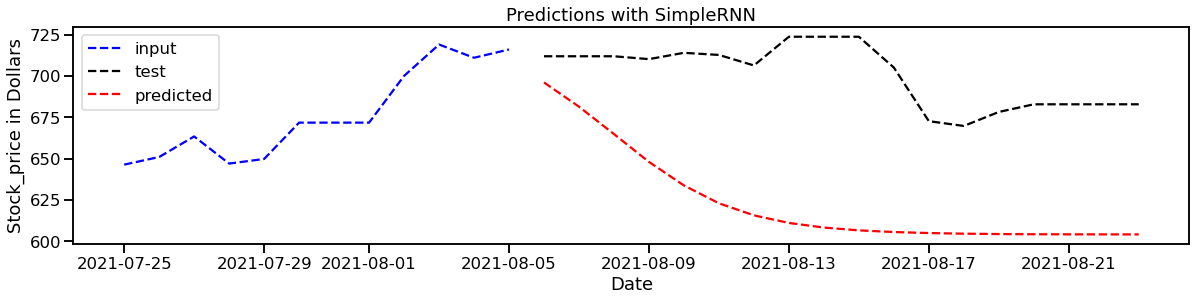

In [255]:
plot_predictions(preds,test_X_init, test_y,df=tesla_new_2,model_name='SimpleRNN')

In [349]:
MSE_simpleRNN=mean_squared_error(preds,test_y)
print('MSE for Simple RNN',MSE_simpleRNN)

MSE for Simple RNN 6588.567283623334


## Now let's see the LSTM model

In [247]:
#Make a model
def fit_LSTM(train_X, train_y, cell_units, epochs):
    """
    Fit Simple RNN to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for RNN cells  
    epochs (int): number of training epochs   
    """

    # initialize model
    model = Sequential() 
    
    # construct an RNN layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(LSTM(cell_units, input_shape=(train_X.shape[1],1)))
    
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=64, verbose=1)
    
    return model

In [248]:
model_2 = fit_LSTM(train_X, train_y, cell_units=80, epochs=1000)

Epoch 1/1000
28/28 [==============================] - 3s 16ms/step - loss: 81751.7344: 0s - loss: 82980.4
Epoch 2/1000
28/28 [==============================] - 0s 15ms/step - loss: 80678.0000
Epoch 3/1000
28/28 [==============================] - 0s 15ms/step - loss: 79405.9766
Epoch 4/1000
28/28 [==============================] - 0s 15ms/step - loss: 77949.1875
Epoch 5/1000
28/28 [==============================] - 0s 15ms/step - loss: 76757.8438
Epoch 6/1000
28/28 [==============================] - 0s 14ms/step - loss: 75252.8672
Epoch 7/1000
28/28 [==============================] - 0s 15ms/step - loss: 74032.5078
Epoch 8/1000
28/28 [==============================] - 0s 14ms/step - loss: 73158.1641
Epoch 9/1000
28/28 [==============================] - 0s 15ms/step - loss: 72384.7969
Epoch 10/1000
28/28 [==============================] - 0s 15ms/step - loss: 71678.5078
Epoch 11/1000
28/28 [==============================] - 0s 14ms/step - loss: 70997.0547
Epoch 12/1000
28/28 [===========

28/28 [==============================] - 0s 14ms/step - loss: 38267.6719
Epoch 95/1000
28/28 [==============================] - 0s 16ms/step - loss: 37971.8672
Epoch 96/1000
28/28 [==============================] - 0s 15ms/step - loss: 37679.4883
Epoch 97/1000
28/28 [==============================] - 0s 15ms/step - loss: 37387.6094
Epoch 98/1000
28/28 [==============================] - 0s 16ms/step - loss: 37102.8359
Epoch 99/1000
28/28 [==============================] - 0s 15ms/step - loss: 36808.6758
Epoch 100/1000
28/28 [==============================] - 0s 16ms/step - loss: 36525.0859
Epoch 101/1000
28/28 [==============================] - 0s 16ms/step - loss: 36242.0156
Epoch 102/1000
28/28 [==============================] - 0s 15ms/step - loss: 35958.7266
Epoch 103/1000
28/28 [==============================] - 0s 17ms/step - loss: 35677.8945
Epoch 104/1000
28/28 [==============================] - 0s 16ms/step - loss: 35396.9531
Epoch 105/1000
28/28 [==============================

28/28 [==============================] - 0s 15ms/step - loss: 17352.3457
Epoch 187/1000
28/28 [==============================] - 0s 16ms/step - loss: 17185.5039
Epoch 188/1000
28/28 [==============================] - 0s 15ms/step - loss: 17019.8750
Epoch 189/1000
28/28 [==============================] - 0s 15ms/step - loss: 16858.2266
Epoch 190/1000
28/28 [==============================] - 0s 16ms/step - loss: 16693.5742
Epoch 191/1000
28/28 [==============================] - 0s 16ms/step - loss: 16533.0137
Epoch 192/1000
28/28 [==============================] - 0s 16ms/step - loss: 16376.6631
Epoch 193/1000
28/28 [==============================] - 0s 15ms/step - loss: 16211.5371
Epoch 194/1000
28/28 [==============================] - 0s 17ms/step - loss: 16056.8760
Epoch 195/1000
28/28 [==============================] - 1s 20ms/step - loss: 15898.1123
Epoch 196/1000
28/28 [==============================] - 1s 19ms/step - loss: 15744.1201
Epoch 197/1000
28/28 [=========================

Epoch 279/1000
28/28 [==============================] - 0s 15ms/step - loss: 6357.3091
Epoch 280/1000
28/28 [==============================] - 0s 15ms/step - loss: 6283.3257
Epoch 281/1000
28/28 [==============================] - 0s 15ms/step - loss: 6201.6030
Epoch 282/1000
28/28 [==============================] - 0s 14ms/step - loss: 6119.7515
Epoch 283/1000
28/28 [==============================] - 0s 15ms/step - loss: 6041.2583
Epoch 284/1000
28/28 [==============================] - 0s 15ms/step - loss: 5967.4912
Epoch 285/1000
28/28 [==============================] - 0s 15ms/step - loss: 5891.6353
Epoch 286/1000
28/28 [==============================] - 0s 15ms/step - loss: 5812.1382
Epoch 287/1000
28/28 [==============================] - 0s 13ms/step - loss: 5742.3018
Epoch 288/1000
28/28 [==============================] - 0s 15ms/step - loss: 5669.5210
Epoch 289/1000
28/28 [==============================] - 0s 15ms/step - loss: 5594.5825
Epoch 290/1000
28/28 [=====================

28/28 [==============================] - 0s 15ms/step - loss: 1725.9053 0s - loss:
Epoch 373/1000
28/28 [==============================] - 0s 15ms/step - loss: 1702.3827
Epoch 374/1000
28/28 [==============================] - 0s 15ms/step - loss: 1679.2668
Epoch 375/1000
28/28 [==============================] - 0s 16ms/step - loss: 1657.3348
Epoch 376/1000
28/28 [==============================] - 0s 15ms/step - loss: 1635.6268
Epoch 377/1000
28/28 [==============================] - 0s 16ms/step - loss: 1608.6521
Epoch 378/1000
28/28 [==============================] - 0s 16ms/step - loss: 1591.2626
Epoch 379/1000
28/28 [==============================] - 0s 16ms/step - loss: 1566.1067
Epoch 380/1000
28/28 [==============================] - 0s 15ms/step - loss: 1549.5447
Epoch 381/1000
28/28 [==============================] - 0s 15ms/step - loss: 1516.7012
Epoch 382/1000
28/28 [==============================] - 0s 16ms/step - loss: 1497.7679
Epoch 383/1000
28/28 [=========================

28/28 [==============================] - 0s 15ms/step - loss: 636.9287
Epoch 467/1000
28/28 [==============================] - 0s 15ms/step - loss: 617.0664
Epoch 468/1000
28/28 [==============================] - 0s 14ms/step - loss: 603.6903
Epoch 469/1000
28/28 [==============================] - 0s 15ms/step - loss: 599.1815
Epoch 470/1000
28/28 [==============================] - 0s 15ms/step - loss: 603.3340
Epoch 471/1000
28/28 [==============================] - 0s 15ms/step - loss: 584.1222
Epoch 472/1000
28/28 [==============================] - 0s 15ms/step - loss: 581.9961
Epoch 473/1000
28/28 [==============================] - 0s 16ms/step - loss: 577.6569
Epoch 474/1000
28/28 [==============================] - 0s 15ms/step - loss: 558.4177
Epoch 475/1000
28/28 [==============================] - 0s 15ms/step - loss: 561.0203
Epoch 476/1000
28/28 [==============================] - 0s 15ms/step - loss: 552.0072
Epoch 477/1000
28/28 [==============================] - 0s 15ms/step 

28/28 [==============================] - 0s 16ms/step - loss: 278.0599
Epoch 561/1000
28/28 [==============================] - 0s 15ms/step - loss: 275.0656
Epoch 562/1000
28/28 [==============================] - 0s 16ms/step - loss: 271.8523
Epoch 563/1000
28/28 [==============================] - 0s 17ms/step - loss: 264.5972
Epoch 564/1000
28/28 [==============================] - 0s 16ms/step - loss: 260.9726
Epoch 565/1000
28/28 [==============================] - 0s 17ms/step - loss: 262.1079
Epoch 566/1000
28/28 [==============================] - 0s 16ms/step - loss: 256.2572
Epoch 567/1000
28/28 [==============================] - 0s 16ms/step - loss: 261.4472
Epoch 568/1000
28/28 [==============================] - 0s 16ms/step - loss: 250.7119
Epoch 569/1000
28/28 [==============================] - 0s 14ms/step - loss: 249.6014
Epoch 570/1000
28/28 [==============================] - 0s 15ms/step - loss: 244.5895
Epoch 571/1000
28/28 [==============================] - 0s 15ms/step 

28/28 [==============================] - 0s 16ms/step - loss: 129.2976
Epoch 655/1000
28/28 [==============================] - 0s 15ms/step - loss: 123.7575
Epoch 656/1000
28/28 [==============================] - 0s 16ms/step - loss: 133.9999
Epoch 657/1000
28/28 [==============================] - 0s 16ms/step - loss: 116.6904: 0s - loss: 115
Epoch 658/1000
28/28 [==============================] - 0s 15ms/step - loss: 126.6751
Epoch 659/1000
28/28 [==============================] - 0s 15ms/step - loss: 123.8682
Epoch 660/1000
28/28 [==============================] - 0s 15ms/step - loss: 144.0769
Epoch 661/1000
28/28 [==============================] - ETA: 0s - loss: 143.525 - 0s 16ms/step - loss: 142.5750
Epoch 662/1000
28/28 [==============================] - 0s 15ms/step - loss: 139.4971
Epoch 663/1000
28/28 [==============================] - 0s 15ms/step - loss: 137.0404
Epoch 664/1000
28/28 [==============================] - 0s 15ms/step - loss: 149.9993
Epoch 665/1000
28/28 [=====

28/28 [==============================] - 0s 14ms/step - loss: 117.8857
Epoch 749/1000
28/28 [==============================] - 0s 15ms/step - loss: 106.96370s - los
Epoch 750/1000
28/28 [==============================] - 0s 15ms/step - loss: 104.8083
Epoch 751/1000
28/28 [==============================] - 0s 15ms/step - loss: 107.0186
Epoch 752/1000
28/28 [==============================] - 0s 15ms/step - loss: 114.0163
Epoch 753/1000
28/28 [==============================] - 0s 15ms/step - loss: 105.9742
Epoch 754/1000
28/28 [==============================] - 0s 15ms/step - loss: 103.8714
Epoch 755/1000
28/28 [==============================] - 0s 16ms/step - loss: 106.6723
Epoch 756/1000
28/28 [==============================] - 0s 16ms/step - loss: 98.3467
Epoch 757/1000
28/28 [==============================] - 0s 16ms/step - loss: 108.4248
Epoch 758/1000
28/28 [==============================] - 0s 16ms/step - loss: 107.6315
Epoch 759/1000
28/28 [==============================] - 0s 16m

28/28 [==============================] - 0s 14ms/step - loss: 124.1627
Epoch 843/1000
28/28 [==============================] - 0s 15ms/step - loss: 121.7407
Epoch 844/1000
28/28 [==============================] - 0s 15ms/step - loss: 116.0264
Epoch 845/1000
28/28 [==============================] - 0s 15ms/step - loss: 111.3947
Epoch 846/1000
28/28 [==============================] - 0s 15ms/step - loss: 114.5731
Epoch 847/1000
28/28 [==============================] - 0s 16ms/step - loss: 126.9070
Epoch 848/1000
28/28 [==============================] - 0s 16ms/step - loss: 130.9657
Epoch 849/1000
28/28 [==============================] - 0s 15ms/step - loss: 119.4856
Epoch 850/1000
28/28 [==============================] - 0s 15ms/step - loss: 122.9893
Epoch 851/1000
28/28 [==============================] - 0s 15ms/step - loss: 123.9697
Epoch 852/1000
28/28 [==============================] - 0s 16ms/step - loss: 108.84180s - loss: 
Epoch 853/1000
28/28 [==============================] - 0s

28/28 [==============================] - 0s 15ms/step - loss: 97.5442
Epoch 936/1000
28/28 [==============================] - 0s 16ms/step - loss: 102.0242
Epoch 937/1000
28/28 [==============================] - 0s 16ms/step - loss: 103.1517
Epoch 938/1000
28/28 [==============================] - 0s 16ms/step - loss: 103.3536
Epoch 939/1000
28/28 [==============================] - 0s 16ms/step - loss: 103.5412
Epoch 940/1000
28/28 [==============================] - 0s 15ms/step - loss: 117.9895
Epoch 941/1000
28/28 [==============================] - 0s 16ms/step - loss: 107.4099
Epoch 942/1000
28/28 [==============================] - 0s 15ms/step - loss: 101.33800s - loss: 106.048 - ETA: 0s - loss: 100.741
Epoch 943/1000
28/28 [==============================] - 0s 16ms/step - loss: 107.3969
Epoch 944/1000
28/28 [==============================] - 0s 15ms/step - loss: 117.0679
Epoch 945/1000
28/28 [==============================] - 0s 15ms/step - loss: 116.4145
Epoch 946/1000
28/28 [====

In [362]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 80)                26240     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 81        
Total params: 26,321
Trainable params: 26,321
Non-trainable params: 0
_________________________________________________________________


In [249]:
#Predictions for LSTM model
preds_2=predict(test_X_init, test_y, model_2)

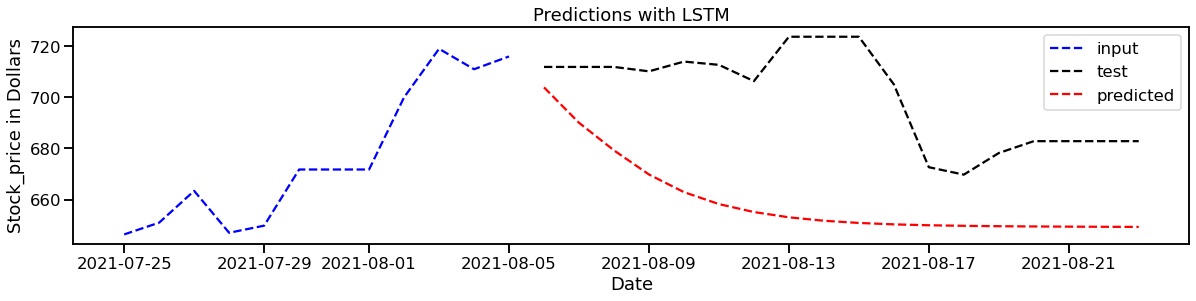

In [256]:
plot_predictions(preds_2,test_X_init, test_y,df=tesla_new_2,model_name='LSTM')

In [348]:
MSE_LSTM=mean_squared_error(preds_2,test_y)
print('MSE for LSTM',MSE_LSTM)

MSE for LSTM 2007.8085346147418


In [353]:
preds.shape

(18, 1)

In [265]:
preds_2_train=predict(train_y[:100], train_y[100:], model_2)

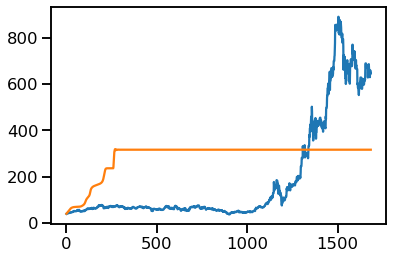

In [266]:
plt.plot(range(len(train_y[100:])),train_y[100:])
plt.plot(range(len(train_y[100:])),preds_2_train)

In [270]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import pmdarima as pm

In [287]:
stepwise_model = pm.auto_arima(tesla_new_2.iloc[:,0], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=1,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13559.214, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13574.572, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13569.151, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13566.997, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13574.825, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13548.774, Time=0.40 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=13546.866, Time=0.29 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=13548.757, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=13550.752, Time=1.40 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=13548.081, Time=0.14 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 4.079 seconds
13546.866210248634


In [273]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

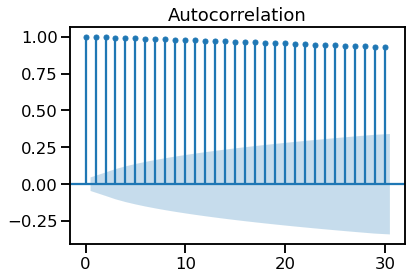

In [275]:
acf_plot=plot_acf(tesla_new_2.iloc[:,0],lags=30)

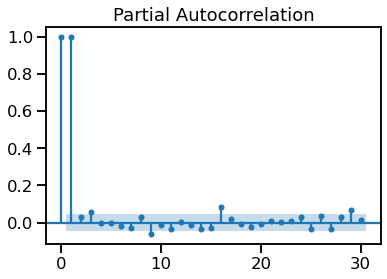

In [276]:
pacf_plot=plot_pacf(tesla_new_2.iloc[:,0],lags=30)

In [280]:
from statsmodels.tsa.seasonal import seasonal_decompose
#seasonal_decompose(tesla_new_2.iloc[:,0]).plot()

In [292]:
sar = sm.tsa.statespace.SARIMAX(tesla_new_2.iloc[:-30,0], 
                                order=(3,1,0), 
                                seasonal_order=(0,0,0,2), 
                                trend='c').fit()

In [326]:
from prophet import Prophet
train_prophet=tesla_new_2.reset_index().iloc[:-18]
train_prophet.rename({'index':'ds','Open stock price':'y'},axis=1,inplace=True)
test_prophet=tesla_new_2.reset_index().iloc[-18:]
test_prophet.rename({'index':'ds','Open stock price':'y'},axis=1,inplace=True)

In [327]:
train_prophet

,ds,y
0,2016-08-23,44.863998
1,2016-08-24,45.410000
2,2016-08-25,44.622002
3,2016-08-26,44.428001
4,2016-08-27,44.428001
...,...,...
1804,2021-08-01,671.760010
1805,2021-08-02,700.000000
1806,2021-08-03,719.000000
1807,2021-08-04,711.000000


In [328]:
m = Prophet(daily_seasonality=True)
m.fit(train_prophet)

In [329]:
future = m.make_future_dataframe(periods=18)
print(future.tail())

             ds
1822 2021-08-19
1823 2021-08-20
1824 2021-08-21
1825 2021-08-22
1826 2021-08-23


In [330]:
# populate forecast
forecast = m.predict(future)
print(forecast.columns)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


,ds,yhat,yhat_lower,yhat_upper
1822,2021-08-19,757.431482,718.283118,804.068901
1823,2021-08-20,760.160841,717.623150,804.479386
1824,2021-08-21,762.498647,722.728542,802.970252
1825,2021-08-22,764.712281,724.405541,807.230216
1826,2021-08-23,767.655528,723.004570,808.871184


In [338]:
forecast.iloc[-18:]['ds']

1809   2021-08-06
1810   2021-08-07
1811   2021-08-08
1812   2021-08-09
1813   2021-08-10
1814   2021-08-11
1815   2021-08-12
1816   2021-08-13
1817   2021-08-14
1818   2021-08-15
1819   2021-08-16
1820   2021-08-17
1821   2021-08-18
1822   2021-08-19
1823   2021-08-20
1824   2021-08-21
1825   2021-08-22
1826   2021-08-23
Name: ds, dtype: datetime64[ns]

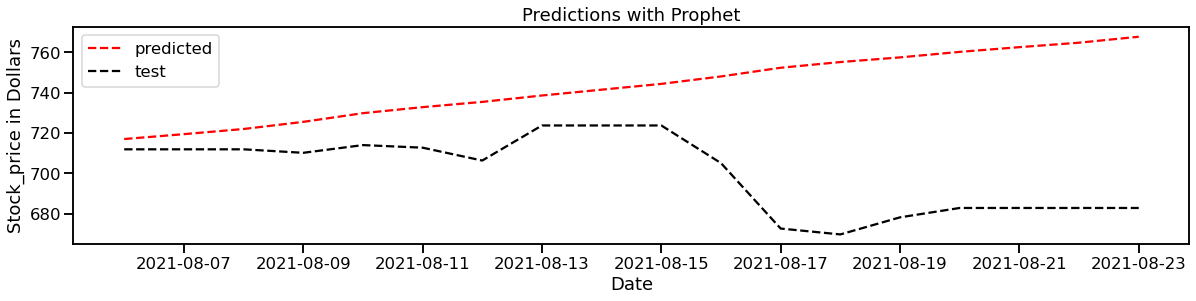

In [351]:
#plot the prediction
fig, ax=plt.subplots(1,1,figsize=(20,4))
ax.plot(forecast.iloc[-18:]['ds'],forecast.iloc[-18:]['yhat'],'r--',label='predicted')
ax.plot(test_prophet['ds'],test_prophet['y'],'k--',label='test')
ax.set(xlabel="Date",ylabel="Stock_price in Dollars",title='Predictions with Prophet')
ax.legend()

In [352]:
#MSE computation
MSE_prophet=mean_squared_error(forecast.iloc[-18:]['yhat'],test_prophet['y'])
print('MSE for Prophet',MSE_prophet)

MSE for Prophet 2824.3011280521823
